<h1><center>First Turn Cast Data Analaysis</center></h1>
<h2><center>It's like if book club had more numbers</center></h2>

This notebook will be for the data analysis of First Turn Cast data. The goal is to move from Tableau to Python for doing data analysis.

In [1]:
## import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.gridspec as GridSpec
# import seaborn as sns

# This adjusted the frame size of display created by pandas in order to 
# utilize the entire width of the jupyter notebook within VSCode.
pd.set_option('display.expand_frame_repr', False)

In [2]:
user_data = pd.read_excel("FirstTurnCombined.xlsx")
user_data.info()
list(user_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Columns: 184 entries, id to work_place_diff
dtypes: float64(34), int64(135), object(15)
memory usage: 300.6+ KB


['id',
 'game',
 'season',
 'play_length',
 'box_length',
 'time_delta',
 'complexity',
 'rating',
 'rank',
 'live',
 'start_player',
 'winner',
 'bp_score',
 'bp_score_normal',
 'bp_score_adjusted',
 'bp_pickup',
 'bp_play_again',
 'eric_score',
 'eric_score_normal',
 'eric_score_adjusted',
 'eric_pickup',
 'eric_play_again',
 'kiwi_score',
 'kiwi_score_normal',
 'kiwi_score_adjusted',
 'kiwi_pickup',
 'kiwi_play_again',
 'kait_score',
 'kait_score_normal',
 'kait_score_adjusted',
 'kait_pickup',
 'kait_play_again',
 'paxton_score',
 'paxton_score_normal',
 'paxton_score_adjusted',
 'paxton_pickup',
 'paxton_play_again',
 'min_normal',
 'average_normal',
 'max_normal',
 'normal_spread',
 'all_played',
 'bgg_mean',
 'bgg_std_dev',
 'bgg_min',
 'bgg_max',
 'bgg_1stq',
 'bgg_3rdq',
 'bgg_median',
 'total_mechanics',
 'advantage_token',
 'area_majority_influence',
 'area_movement',
 'action_drafting',
 'action_event',
 'action_points',
 'action_retrieval',
 'action_timer',
 'action_queue'

The RangeIndex above is the number of games in the database. The column index is for each of the datapoints in game. Most of the columns are integers, these are primarily the columns pertaining to mechanics. As <code>1</code> indicates that the mechanic is present in the game and a <code>0</code> indicates it is not present. The columns of float type are those pertaining to actual statistics. The object columns are primarily game winner, game start, if the players would pick it up, if they would play it again etcetera.

In [3]:
user_data.describe(include='all')

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,turn_to_pass,turn_role_order,turn_progressive,variable_player_powers,variable_phase_order,variable_setup,vp_as_resource,worker_placement,work_place_dice,work_place_diff
count,209.000000,182,182.000000,174.000000,182.000000,201.000000,182.000000,180.000000,180.000000,182,...,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
unique,NaN,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Call to Adventure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,101.885167,NaN,2.582418,75.672414,55.472527,18.064677,2.258473,7.481111,1874.144444,NaN,...,0.019139,0.004785,0.019139,0.224880,0.033493,0.052632,0.023923,0.110048,0.019139,0.009569
std,56.993895,NaN,1.082926,47.737379,30.958836,29.354400,0.692107,0.445560,2845.204603,NaN,...,0.137342,0.069171,0.137342,0.418506,0.180352,0.223833,0.153178,0.313701,0.137342,0.097588
min,1.000000,NaN,1.000000,13.000000,12.000000,-60.000000,0.000000,6.100000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,NaN,2.000000,40.000000,31.250000,0.000000,1.880000,7.200000,253.500000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,105.000000,NaN,3.000000,60.000000,45.000000,10.000000,2.185000,7.500000,603.500000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,148.000000,NaN,4.000000,90.000000,75.000000,30.000000,2.587500,7.800000,2293.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


It looks as though we need to change the mechanic columsn to binomial type, there shouldn't be much that the quartiles can provide. The mean can at least provide a precentage of games with a particular mechanic.

In [4]:
user_data.head()

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,turn_to_pass,turn_role_order,turn_progressive,variable_player_powers,variable_phase_order,variable_setup,vp_as_resource,worker_placement,work_place_dice,work_place_diff
0,1,7 Wonders Duel,1.0,60.0,30.0,30.0,2.22,8.1,17.0,No,...,0,0,0,0,0,0,0,0,0,0
1,2,Altiplano,1.0,150.0,90.0,60.0,3.31,7.6,277.0,No,...,0,0,0,1,0,0,0,0,0,0
2,3,Arboretum,1.0,40.0,30.0,10.0,2.15,7.4,252.0,No,...,0,0,0,0,0,0,0,0,0,0
3,4,Biblios,1.0,40.0,30.0,10.0,1.68,7.2,324.0,No,...,0,0,0,0,0,0,0,0,0,0
4,5,Call to Adventure,1.0,75.0,45.0,30.0,2.00,7.4,1114.0,Yes,...,0,0,0,0,0,0,0,0,0,0


It appears that some of the columns that are showing as floats (play_length and rank for example) should actually be ints.

Next, we're going to break each season apart so that can be compared. We'll remove games where all three cohosts were note present, and that they have been played (there is prerecorded information in the database prior to gameplay for ease of data entry later). Following that there is some inditial data exploration.

In [5]:
season_one = user_data[(user_data['season'] == 1) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_two = user_data[(user_data['season'] == 2) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_three = user_data[(user_data['season'] == 3) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_four = user_data[(user_data['season'] == 4) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]

In [6]:
print(f'There were {len(user_data[user_data["season"] == 4]) - 1} games played this season.')
print(f'There were {len(season_four["game"]) - 1} games played by all the hosts.')

There were 46 games played this season.
There were 17 games played by all the hosts.


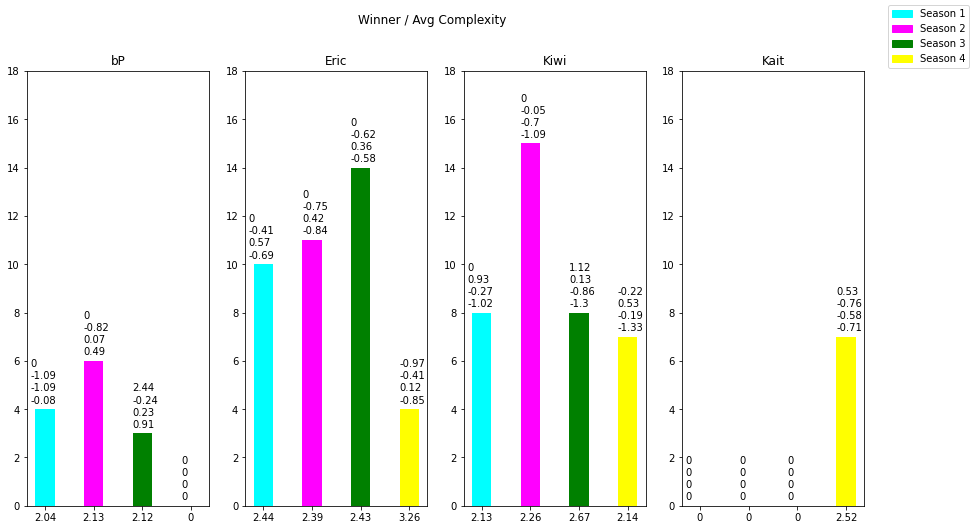

In [7]:
def build_player_wins(fig, pos, player):
  season_wins = [
    season_one[season_one['winner'] == player].count()[0] if season_one[season_one['winner'] == player].count()[0] else 0,
    season_two[season_two['winner'] == player].count()[0] if season_two[season_two['winner'] == player].count()[0] else 0,
    season_three[season_three['winner'] == player].count()[0] if season_three[season_three['winner'] == player].count()[0] else 0,
    season_four[season_four['winner'] == player].count()[0] if season_four[season_four['winner'] == player].count()[0] else 0
  ]
  season_complexity = [
    str(0 if pd.isna(round(np.mean(season_one[season_one['winner'] == player]['complexity']), 2)) else round(np.mean(season_one[season_one['winner'] == player]['complexity']), 2)),
    str(0 if pd.isna(round(np.mean(season_two[season_two['winner'] == player]['complexity']), 2)) else round(np.mean(season_two[season_two['winner'] == player]['complexity']), 2)),
    str(0 if pd.isna(round(np.mean(season_three[season_three['winner'] == player]['complexity']), 2)) else round(np.mean(season_three[season_three['winner'] == player]['complexity']), 2)),
    str(0 if pd.isna(round(np.mean(season_four[season_four['winner'] == player]['complexity']), 2)) else round(np.mean(season_four[season_four['winner'] == player]['complexity']), 2))
  ]
  play_fig = fig.add_subplot(pos)
  play_fig.bar([f'S{str(i)}' for i in range(1,len(season_wins) + 1)], season_wins, width=0.4, color=['cyan', 'magenta', 'green', 'yellow'], zorder=3)
  play_fig.set_ylim(0,18)
  play_fig.set_title(f'{player}')
  play_fig.set_xticks(['S1', 'S2', 'S3', 'S4'])
  play_fig.set_xticklabels(season_complexity)
  play_fig.text(-0.3, season_wins[0] + 0.25, 0 if pd.isna(round(np.mean(season_one[season_one['winner'] == player]['bp_score_adjusted']), 2)) else round(np.mean(season_one[season_one['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(-0.3, season_wins[0] + 0.75, 0 if pd.isna(round(np.mean(season_one[season_one['winner'] == player]['eric_score_adjusted']), 2)) else round(np.mean(season_one[season_one['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(-0.3, season_wins[0] + 1.25, 0 if pd.isna(round(np.mean(season_one[season_one['winner'] == player]['kiwi_score_adjusted']), 2)) else round(np.mean(season_one[season_one['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(-0.3, season_wins[0] + 1.75, 0 if pd.isna(round(np.mean(season_one[season_one['winner'] == player]['kait_score_adjusted']), 2)) else round(np.mean(season_one[season_one['winner'] == player]['kait_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 0.25, 0 if pd.isna(round(np.mean(season_two[season_two['winner'] == player]['bp_score_adjusted']), 2)) else round(np.mean(season_two[season_two['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 0.75, 0 if pd.isna(round(np.mean(season_two[season_two['winner'] == player]['eric_score_adjusted']), 2)) else round(np.mean(season_two[season_two['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 1.25, 0 if pd.isna(round(np.mean(season_two[season_two['winner'] == player]['kiwi_score_adjusted']), 2)) else round(np.mean(season_two[season_two['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 1.75, 0 if pd.isna(round(np.mean(season_two[season_two['winner'] == player]['kait_score_adjusted']), 2)) else round(np.mean(season_two[season_two['winner'] == player]['kait_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 0.25, 0 if pd.isna(round(np.mean(season_three[season_three['winner'] == player]['bp_score_adjusted']), 2)) else round(np.mean(season_three[season_three['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 0.75, 0 if pd.isna(round(np.mean(season_three[season_three['winner'] == player]['eric_score_adjusted']), 2)) else round(np.mean(season_three[season_three['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 1.25, 0 if pd.isna(round(np.mean(season_three[season_three['winner'] == player]['kiwi_score_adjusted']), 2)) else round(np.mean(season_three[season_three['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 1.75, 0 if pd.isna(round(np.mean(season_three[season_three['winner'] == player]['kait_score_adjusted']), 2)) else round(np.mean(season_three[season_three['winner'] == player]['kait_score_adjusted']), 2))
  play_fig.text(2.8, season_wins[3] + 0.25, 0 if pd.isna(round(np.mean(season_four[season_four['winner'] == player]['bp_score_adjusted']), 2)) else round(np.mean(season_four[season_four['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(2.8, season_wins[3] + 0.75, 0 if pd.isna(round(np.mean(season_four[season_four['winner'] == player]['eric_score_adjusted']), 2)) else round(np.mean(season_four[season_four['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(2.8, season_wins[3] + 1.25, 0 if pd.isna(round(np.mean(season_four[season_four['winner'] == player]['kiwi_score_adjusted']), 2)) else round(np.mean(season_four[season_four['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(2.8, season_wins[3] + 1.75, 0 if pd.isna(round(np.mean(season_four[season_four['winner'] == player]['kait_score_adjusted']), 2)) else round(np.mean(season_four[season_four['winner'] == player]['kait_score_adjusted']), 2))

wins_and_complexity = plt.figure(figsize=(15,8))
wins_and_complexity.suptitle("Winner / Avg Complexity")
legend_cyan = mpatches.Patch(color='cyan', label='Season 1')
legend_magenta = mpatches.Patch(color='magenta', label='Season 2')
legend_green = mpatches.Patch(color='green', label='Season 3')
legend_yellow = mpatches.Patch(color='yellow', label='Season 4')
wins_and_complexity.legend(handles=[legend_cyan, legend_magenta, legend_green, legend_yellow])
build_player_wins(wins_and_complexity, 141, 'bP')
build_player_wins(wins_and_complexity, 142, 'Eric')
build_player_wins(wins_and_complexity, 143, 'Kiwi')
build_player_wins(wins_and_complexity, 144, 'Kait')

There were two significant changes to the database this year over the last two years. The first was how each game mechanic was recorded in the database in order to make data analysis easier. The second was the standardization score. Previously, The score was an interpolation between 0 and 10 as compared to 50 scores recorded by other users on BGG. This year, it was standardized in order to bring scores to the mean. So the above table: Each bar represents the number of wins in a season. The number below represents the mean complexity of the games won. The numbers above each bar are the means of the standarized scores for each player based on who won the game, all columns the score goes bp, eric, kiwi. The standardized number goes from -1 to 1 with 0 representing the mean of BGG scores. The closer to 0, the closer to average. More positive means higher above average and vice versa for a negative number.

Eric has steadily improved on his win rate and generally wins the more complex games. Season 2 appears to be an outlier for Kiwi as he had a significant drop in his wins and is even below his season 1 tally.

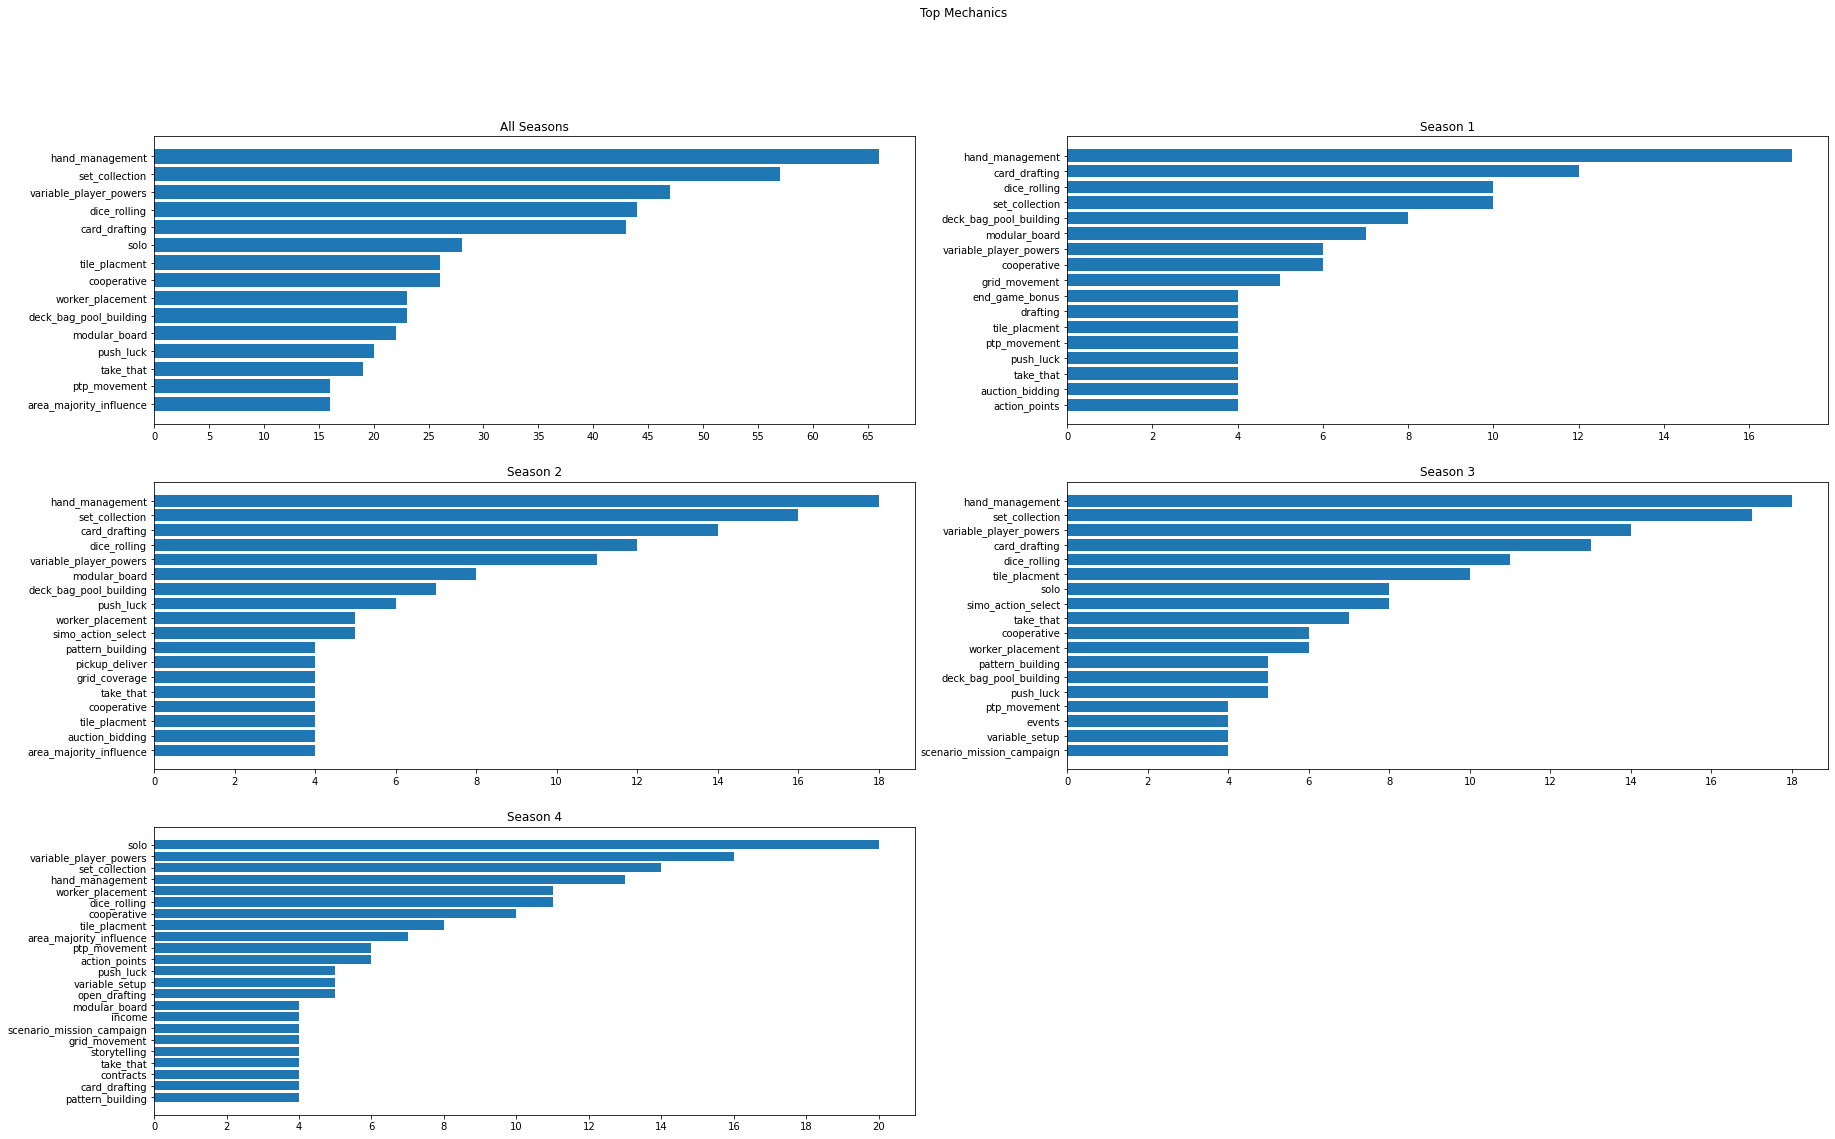

In [8]:
def build_mech_chart(fig, pos, season='all'):
  mech_fig = fig.add_subplot(pos)
  if season == 'all':
    total_mechs = user_data.loc[:, 'advantage_token':'work_place_dice'].sum()
    filter_mechs = total_mechs.where(total_mechs >= (user_data['season'].max() * 4))
    sorted_mechs = filter_mechs.dropna().sort_values(ascending=True)
    mech_fig.set_title('All Seasons')
    mech_fig.xaxis.set_major_locator(ticker.MultipleLocator(5))
  else:
    total_mechs = user_data[user_data['season'] == season].loc[:, 'advantage_token':'work_place_dice'].sum()
    filter_mechs = total_mechs.where(total_mechs >= 4)
    sorted_mechs = filter_mechs.dropna().sort_values(ascending=True)
    mech_fig.set_title(f'Season {season}')
    mech_fig.xaxis.set_major_locator(ticker.MultipleLocator(2))
  mech_fig.barh(sorted_mechs.keys(), sorted_mechs)
  return None

top_mechanics = plt.figure(figsize=(30,18))
top_mechanics.suptitle("Top Mechanics")
build_mech_chart(top_mechanics, 321)
build_mech_chart(top_mechanics, 322, 1)
build_mech_chart(top_mechanics, 323, 2)
build_mech_chart(top_mechanics, 324, 3)
build_mech_chart(top_mechanics, 325, 4)


This shows the top mechanics for games that we've played. It's broken out by each season, and then a similiar graph to represents the total. Predominately, Hand Management is the big one. This makes sense as pretty much any game with cards is going to have hand management listed but it's rarely if ever the primary mechanic. We've steadily increased games that contain set collection while decreasing games deck/bag/pool building, probably to bP's enjoyment.

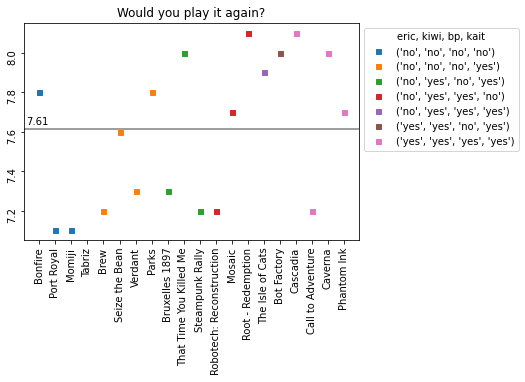

In [9]:
season_four = user_data[(user_data['season'] == 4) & (user_data['all_played'] == 'yes')]
groups = season_four.groupby(by=['eric_play_again', 'kiwi_play_again', 'bp_play_again', 'kait_play_again'])
for name, group in groups:
  plt.plot(group['game'], group['rating'], marker='s', linestyle='', markersize=5, label=name)
plt.axhline(season_four['rating'].mean(), -1, len(season_four['game']), color='grey')
plt.tick_params(rotation=90)
plt.legend(title='eric, kiwi, bp, kait', bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.title('Would you play it again?')
plt.text(-0.8, np.mean(season_four['rating']) + 0.02, round(np.mean(season_four['rating']), 2))
plt.show()

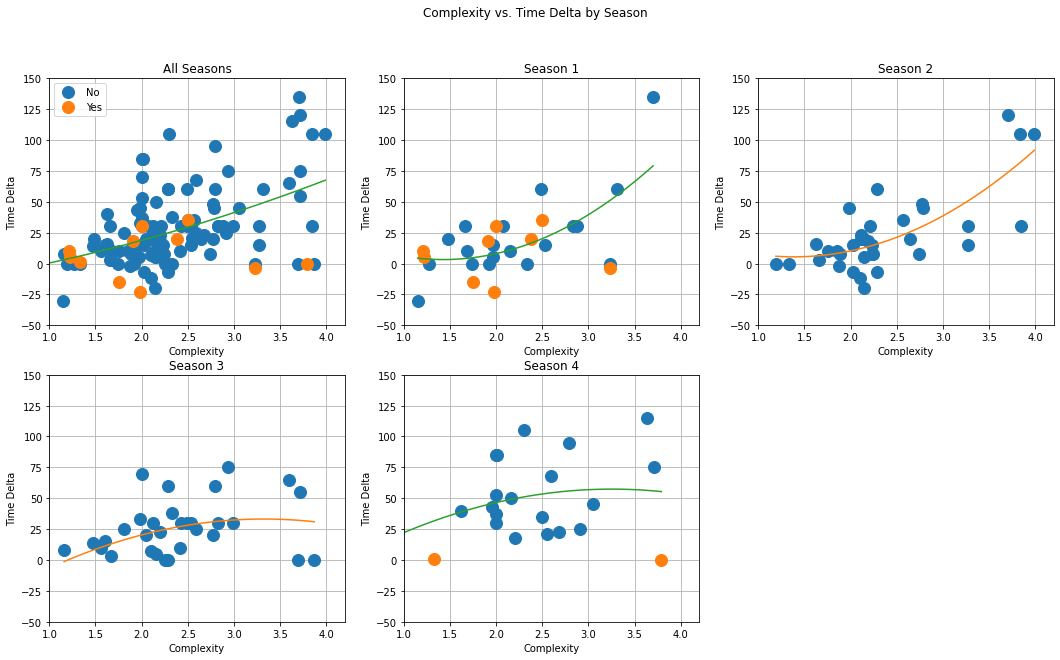

In [10]:
def build_delta_complexity(fig, pos, season='all'):
  complex_plot = fig.add_subplot(pos)
  if season == 'all':
    all_data = user_data.loc[(user_data['all_played'] == 'yes') & (user_data['time_delta'].notnull()) & (user_data['complexity'].notnull())]
    pfit = np.polynomial.polynomial.Polynomial.fit(all_data['complexity'], all_data['time_delta'], 2)
    groups = all_data.groupby('live')
    for name, group in groups:
      complex_plot.plot(group['complexity'], group['time_delta'], marker='o', linestyle='', markersize=12, label=name)
    complex_plot.plot(*pfit.linspace())
    complex_plot.legend()
    complex_plot.set_title('All Seasons')
  else:
    season_data = user_data[(user_data['season'] == season) & (user_data['all_played'] == 'yes') & (user_data['complexity'].notnull()) & (user_data['time_delta'].notnull()) ]
    pfit = np.polynomial.polynomial.Polynomial.fit(season_data['complexity'], season_data['time_delta'], 2)
    groups = season_data.groupby('live')
    for name, group in groups:
      complex_plot.plot(group['complexity'], group['time_delta'], marker='o', linestyle='', markersize=12, label=name)
    complex_plot.plot(*pfit.linspace())
    complex_plot.set_title(f'Season {season}')
  complex_plot.set_ylabel('Time Delta')
  complex_plot.set_xlabel('Complexity')
  complex_plot.set_ylim(-50,150)
  complex_plot.set_xlim(1,4.2)
  complex_plot.grid()

delt_comp_figure = plt.figure(figsize=(18,10))
delt_comp_figure.suptitle("Complexity vs. Time Delta by Season")
build_delta_complexity(delt_comp_figure, 231)
build_delta_complexity(delt_comp_figure, 232, 1)
build_delta_complexity(delt_comp_figure, 233, 2)
build_delta_complexity(delt_comp_figure, 234, 3)
build_delta_complexity(delt_comp_figure, 235, 4)


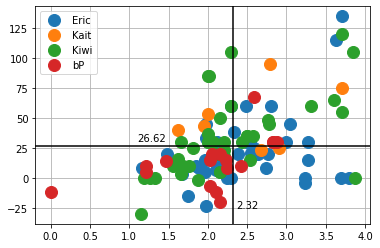

The mean complexity for season 1 was 2.25.
The mean complexity for season 2 was 2.28.
The mean complexity for season 3 was 2.47.
The mean complexity for season 4 was 2.35.
The mean complexity for the series is 2.32.


In [11]:
all_data = user_data[(user_data['all_played'] == 'yes') & (user_data['time_delta'].notnull())]
complex_mean = all_data['complexity'].mean()
time_delta_mean = all_data['time_delta'].mean()
groups = all_data.groupby('winner')
for name, group in groups:
  plt.plot(group['complexity'], group['time_delta'], marker='o', linestyle='', markersize=12, label=name)
plt.axhline(time_delta_mean, color='black')
plt.text(1.1, time_delta_mean + 4, round(time_delta_mean, 2))
plt.axvline(complex_mean, color='black')
plt.text(complex_mean + 0.035, -25, round(complex_mean, 2))
plt.legend()
plt.grid()
plt.show()

print(f"The mean complexity for season 1 was {round(np.mean(season_one['complexity']), 2)}.")
print(f"The mean complexity for season 2 was {round(np.mean(season_two['complexity']), 2)}.")
print(f"The mean complexity for season 3 was {round(np.mean(season_three['complexity']), 2)}.")
print(f"The mean complexity for season 4 was {round(np.mean(season_four['complexity']), 2)}.")
print(f"The mean complexity for the series is {round(np.mean(all_data['complexity']), 2)}.")


103    Colt Express
112        Cat Lady
Name: game, dtype: object
137     The Isle of Cats
139       Bruxelles 1897
140             Cascadia
141                 Brew
142              Bonfire
144       Seize the Bean
145           Port Royal
151    Call to Adventure
153              Verdant
156              Caverna
164                Parks
165               Momiji
166        Transmissions
175               Tabriz
178          Bot Factory
180               Mosaic
181    Root - Redemption
Name: game, dtype: object


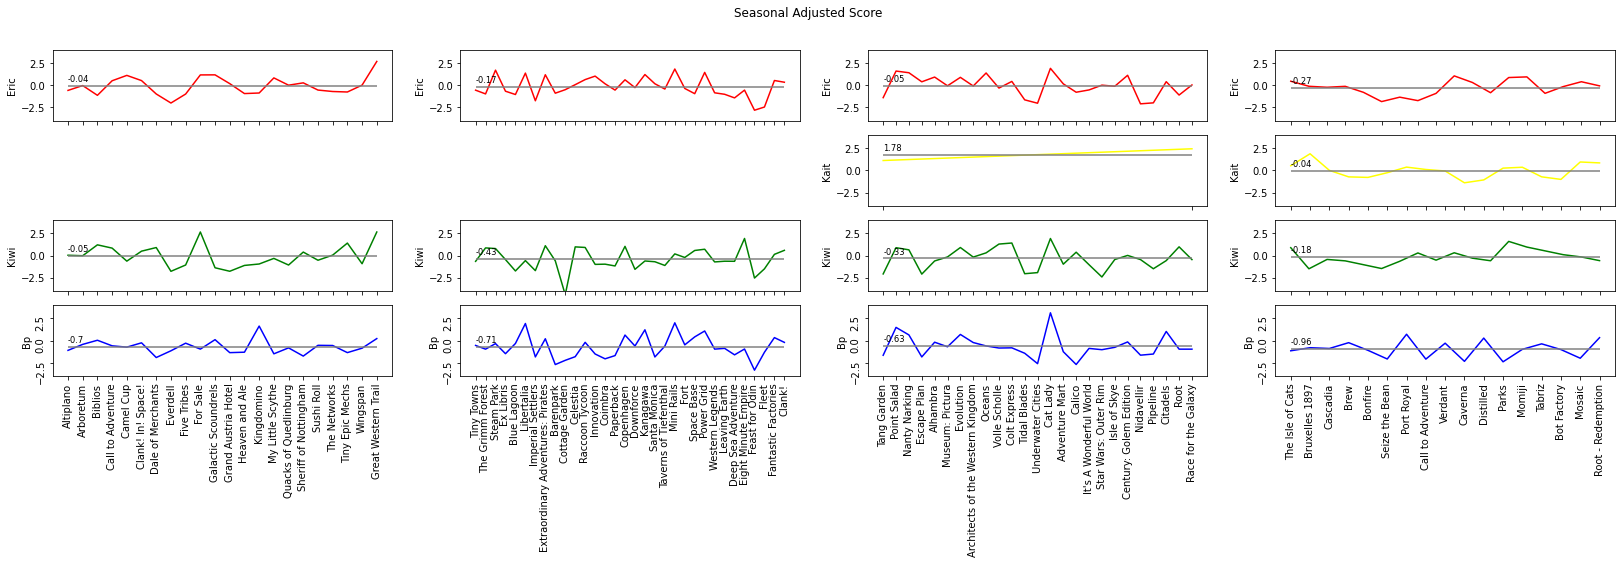

In [12]:
def build_adj_score(fig, pos, player, season, xlab=False):
  season_score = season[(season[f'{player}_score_adjusted'].notnull())]
  if player == 'eric':
    playColor = 'red'
  elif player == 'kiwi':
    playColor = 'green'
  elif player == 'bp':
    playColor = 'blue'
  elif player == 'kait':
    playColor = 'yellow'
  else:
    playColor = 'black'
  play_fig = plt.Subplot(fig, pos)
  if player == 'kait' and len(season_score) > 0:
    print(season_score['game'])
  if len(season_score) > 0:
    play_fig.plot(season_score['game'], season_score[f'{player}_score_adjusted'], color=playColor)
    play_fig.hlines(np.mean(season_score[f'{player}_score_adjusted']), 0, len(season_score['game'])-1, color ='grey')
    play_fig.text(0,np.mean(season_score[f'{player}_score_adjusted']) + 0.5,round(np.mean(season_score[f'{player}_score_adjusted']), 2),fontsize='small')
    if not xlab:
      play_fig.xaxis.set_ticklabels([])
    else:
      play_fig.tick_params(rotation=90)
    play_fig.set_ylim(-4,4)
    play_fig.set_ylabel(f'{player.capitalize()}')
    fig.add_subplot(play_fig)

fig = plt.figure(figsize=(28,6))
fig.suptitle("Seasonal Adjusted Score")
outer = GridSpec.GridSpec(1,4)
current_seasons = [season_one, season_two, season_three, season_four]
for i in range(len(current_seasons)):
    inner = GridSpec.GridSpecFromSubplotSpec(4,1, subplot_spec=outer[i])
    build_adj_score(fig, inner[0, 0], 'eric', current_seasons[i])
    build_adj_score(fig, inner[1, 0], 'kait', current_seasons[i])
    build_adj_score(fig, inner[2, 0], 'kiwi', current_seasons[i])
    build_adj_score(fig, inner[3, 0], 'bp', current_seasons[i], xlab=True)

Does theme impact score?
Does thinking we want to play it impact score?
How often are we right or wrong about what we'll like?


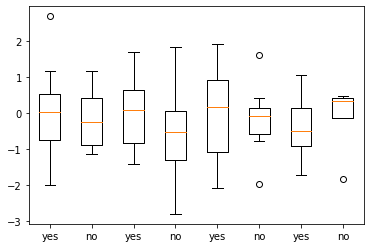

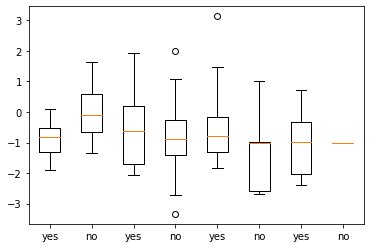

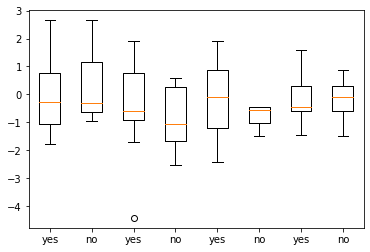

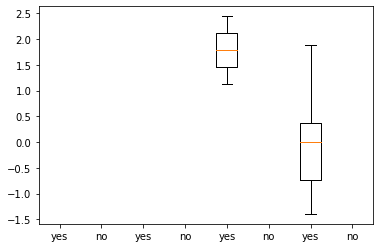

In [13]:
data = [] 
data.append(season_one[(season_one['eric_pickup']=='yes') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_one[(season_one['eric_pickup']=='no') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_pickup']=='yes') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_pickup']=='no') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_pickup']=='yes') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_pickup']=='no') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_four[(season_four['eric_pickup']=='yes') & (season_four['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_four[(season_four['eric_pickup']=='no') & (season_four['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['bp_pickup']=='yes') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_one[(season_one['bp_pickup']=='no') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_pickup']=='yes') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_pickup']=='no') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_pickup']=='yes') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_pickup']=='no') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_four[(season_four['bp_pickup']=='yes') & (season_four['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_four[(season_four['bp_pickup']=='no') & (season_four['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['kiwi_pickup']=='yes') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_one[(season_one['kiwi_pickup']=='no') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_pickup']=='yes') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_pickup']=='no') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_pickup']=='yes') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_pickup']=='no') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_four[(season_four['kiwi_pickup']=='yes') & (season_four['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_four[(season_four['kiwi_pickup']=='no') & (season_four['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
data = [] 
data.append(season_one[(season_one['kait_pickup']=='yes') & (season_one['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_one[(season_one['kait_pickup']=='no') & (season_one['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_two[(season_two['kait_pickup']=='yes') & (season_two['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_two[(season_two['kait_pickup']=='no') & (season_two['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_three[(season_three['kait_pickup']=='yes') & (season_three['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_three[(season_three['kait_pickup']=='no') & (season_three['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_four[(season_four['kait_pickup']=='yes') & (season_four['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_four[(season_four['kait_pickup']=='no') & (season_four['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()

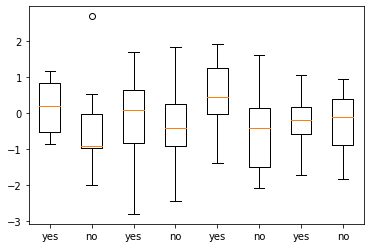

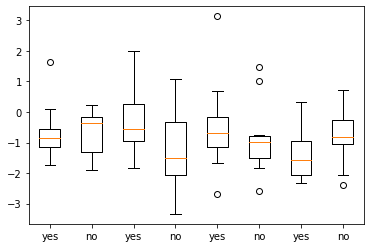

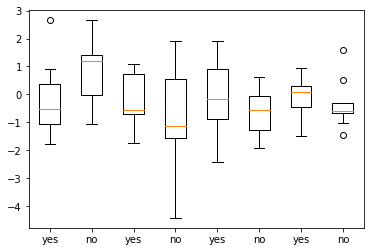

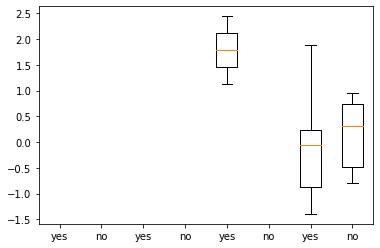

In [14]:
data = [] 
data.append(season_one[(season_one['eric_play_again']=='yes') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_one[(season_one['eric_play_again']=='no') & (season_one['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_play_again']=='yes') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_two[(season_two['eric_play_again']=='no') & (season_two['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_play_again']=='yes') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_three[(season_three['eric_play_again']=='no') & (season_three['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_four[(season_four['eric_play_again']=='yes') & (season_four['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
data.append(season_four[(season_four['eric_play_again']=='no') & (season_four['eric_score_adjusted'].notnull())]['eric_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['bp_play_again']=='yes') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_one[(season_one['bp_play_again']=='no') & (season_one['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_play_again']=='yes') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_two[(season_two['bp_play_again']=='no') & (season_two['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_play_again']=='yes') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_three[(season_three['bp_play_again']=='no') & (season_three['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_four[(season_four['bp_play_again']=='yes') & (season_four['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
data.append(season_four[(season_four['bp_play_again']=='no') & (season_four['bp_score_adjusted'].notnull())]['bp_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
plt.clf()
data = [] 
data.append(season_one[(season_one['kiwi_play_again']=='yes') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_one[(season_one['kiwi_play_again']=='no') & (season_one['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_play_again']=='yes') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_two[(season_two['kiwi_play_again']=='no') & (season_two['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_play_again']=='yes') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_three[(season_three['kiwi_play_again']=='no') & (season_three['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_four[(season_four['kiwi_play_again']=='yes') & (season_four['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
data.append(season_four[(season_four['kiwi_play_again']=='no') & (season_four['kiwi_score_adjusted'].notnull())]['kiwi_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()
data = [] 
data.append(season_one[(season_one['kait_play_again']=='yes') & (season_one['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_one[(season_one['kait_play_again']=='no') & (season_one['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_two[(season_two['kait_play_again']=='yes') & (season_two['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_two[(season_two['kait_play_again']=='no') & (season_two['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_three[(season_three['kait_play_again']=='yes') & (season_three['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_three[(season_three['kait_play_again']=='no') & (season_three['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_four[(season_four['kait_play_again']=='yes') & (season_four['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
data.append(season_four[(season_four['kait_play_again']=='no') & (season_four['kait_score_adjusted'].notnull())]['kait_score_adjusted'])
plt.boxplot(data, labels=['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no'])
plt.show()

In [15]:
print(f"In season 1, eric would play {round(len(season_one[season_one['eric_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 he would play {round(len(season_two[season_two['eric_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. In season 3 he would play {round(len(season_three[season_three['eric_play_again']=='yes']) / len(season_three['game']), 2)*100}% again. Finally, in season 4 he would play {round(len(season_four[season_four['eric_play_again']=='yes']) / len(season_four['game']), 2)*100}% again.")
print(f"In season 1, bp would play {round(len(season_one[season_one['bp_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 she would play {round(len(season_two[season_two['bp_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. In season 3 she would play {round(len(season_three[season_three['bp_play_again']=='yes']) / len(season_three['game']), 2)*100}% again. Finally, in season 4 she would play {round(len(season_four[season_four['bp_play_again']=='yes']) / len(season_four['game']), 2)*100}% again.")
print(f"In season 1, kiwi would play {round(len(season_one[season_one['kiwi_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 he would play {round(len(season_two[season_two['kiwi_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. In season 3 he would play {round(len(season_three[season_three['kiwi_play_again']=='yes']) / len(season_three['game']), 2)*100}% again. Finally, in season 4 he would play {round(len(season_four[season_four['kiwi_play_again']=='yes']) / len(season_four['game']), 2)*100}% again.")
print(f"In season 1, kait would play {round(len(season_one[season_one['kait_play_again']=='yes']) / len(season_one['game']), 2)*100}% again. In season 2 she would play {round(len(season_two[season_two['kait_play_again']=='yes']) / len(season_two['game']), 2)*100}% again. In season 3 she would play {round(len(season_three[season_three['kait_play_again']=='yes']) / len(season_three['game']), 2)*100}% again. Finally, in season 4 she would play {round(len(season_four[season_four['kait_play_again']=='yes']) / len(season_four['game']), 2)*100}% again.")

In season 1, eric would play 59.0% again. In season 2 he would play 53.0% again. In season 3 he would play 44.0% again. Finally, in season 4 he would play 23.0% again.
In season 1, bp would play 64.0% again. In season 2 she would play 59.0% again. In season 3 she would play 60.0% again. Finally, in season 4 she would play 36.0% again.
In season 1, kiwi would play 77.0% again. In season 2 he would play 72.0% again. In season 3 he would play 72.0% again. Finally, in season 4 he would play 59.0% again.
In season 1, kait would play 0.0% again. In season 2 she would play 0.0% again. In season 3 she would play 8.0% again. Finally, in season 4 she would play 64.0% again.


In [16]:

eric_right_wrong = all_data[all_data['eric_pickup'] != all_data['eric_play_again']]
print(all_data['eric_play_again'].value_counts())
print(eric_right_wrong['eric_play_again'].value_counts())
print(eric_right_wrong['game'].count() / len(all_data))

kiwi_right_wrong = all_data[all_data['kiwi_pickup'] != all_data['kiwi_play_again']]
print(all_data['kiwi_play_again'].value_counts())
print(kiwi_right_wrong['kiwi_play_again'].value_counts())
print(kiwi_right_wrong['game'].count() / len(all_data))

bp_right_wrong = all_data[all_data['bp_pickup'] != all_data['bp_play_again']]
print(all_data['bp_play_again'].value_counts())
print(bp_right_wrong['bp_play_again'].value_counts())
print(bp_right_wrong['game'].count() / len(all_data))

kait_right_wrong = all_data[all_data['kait_pickup'] != all_data['kait_play_again']]
print(all_data['kait_play_again'].value_counts())
print(kait_right_wrong['kait_play_again'].value_counts())
print(kait_right_wrong['game'].count() / len(all_data))

no     60
yes    58
Name: eric_play_again, dtype: int64
no     32
yes    11
Name: eric_play_again, dtype: int64
0.3644067796610169
yes    85
no     33
Name: kiwi_play_again, dtype: int64
no     22
yes    11
Name: kiwi_play_again, dtype: int64
0.2796610169491525
yes    69
no     48
Name: bp_play_again, dtype: int64
no     29
yes    14
Name: bp_play_again, dtype: int64
0.3728813559322034
yes    17
no      7
Name: kait_play_again, dtype: int64
no    6
Name: kait_play_again, dtype: int64
0.847457627118644


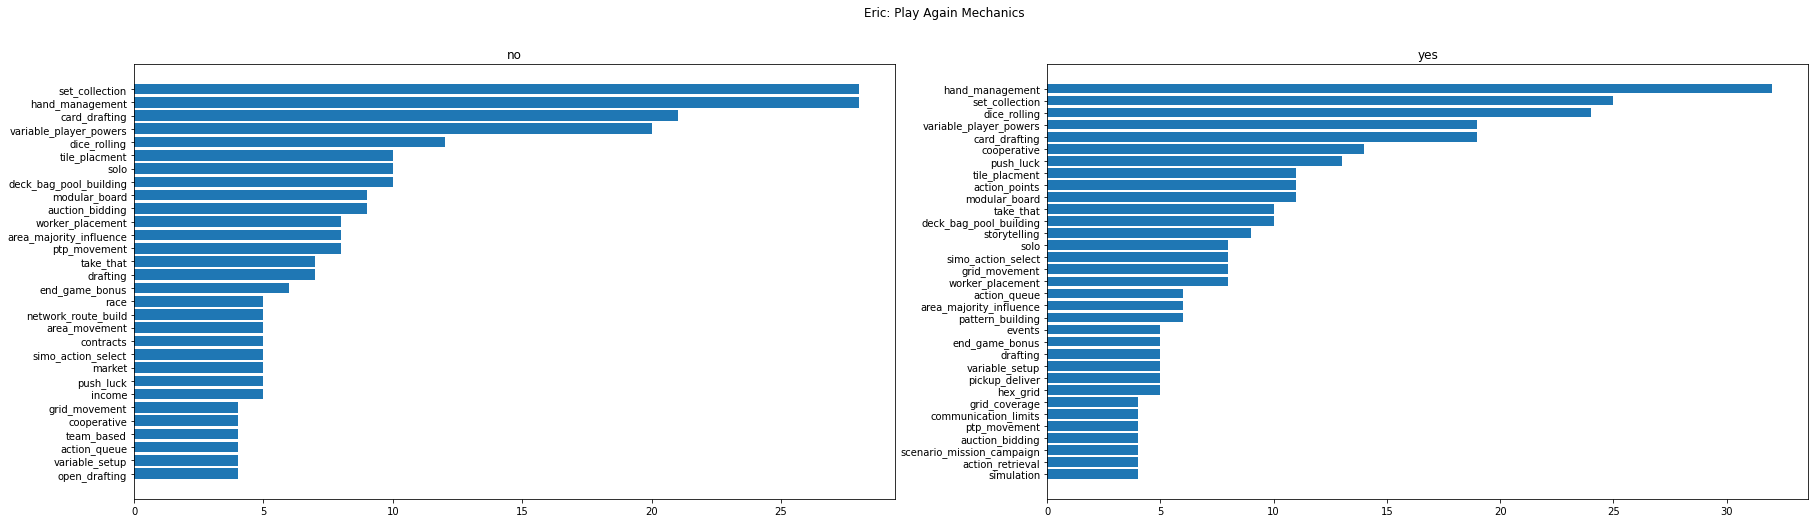

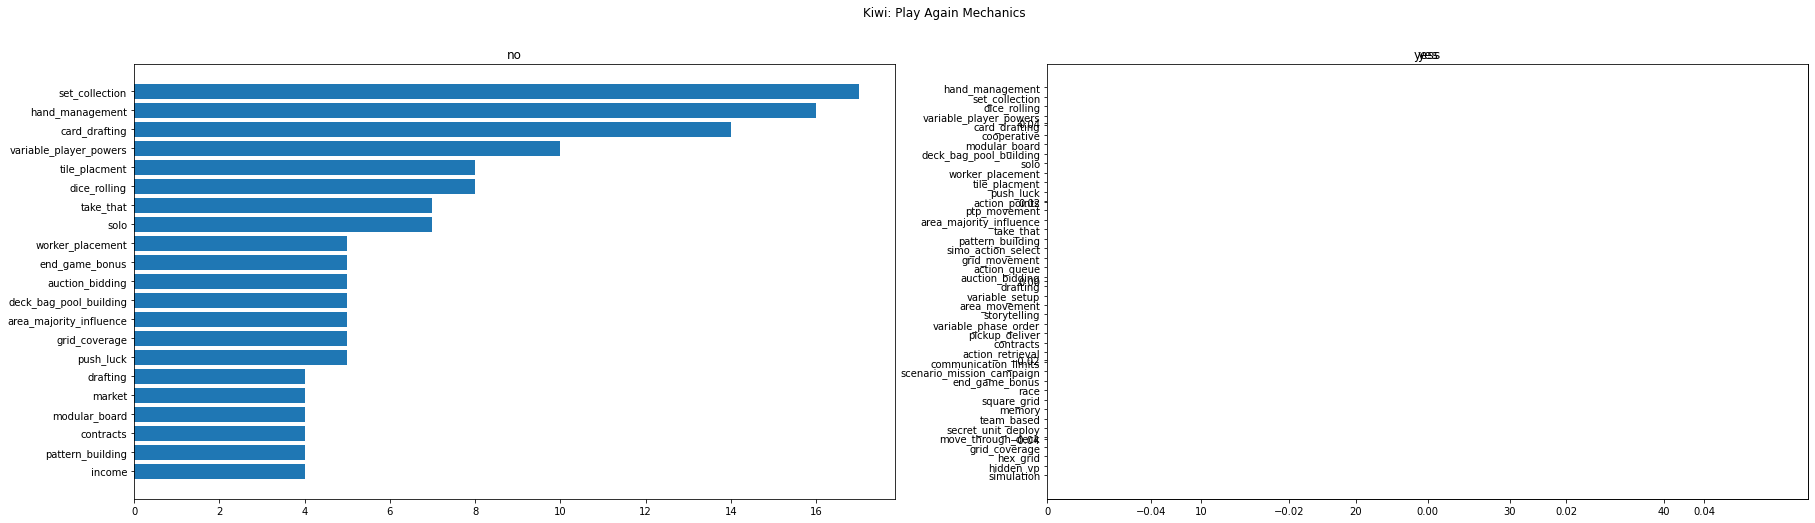

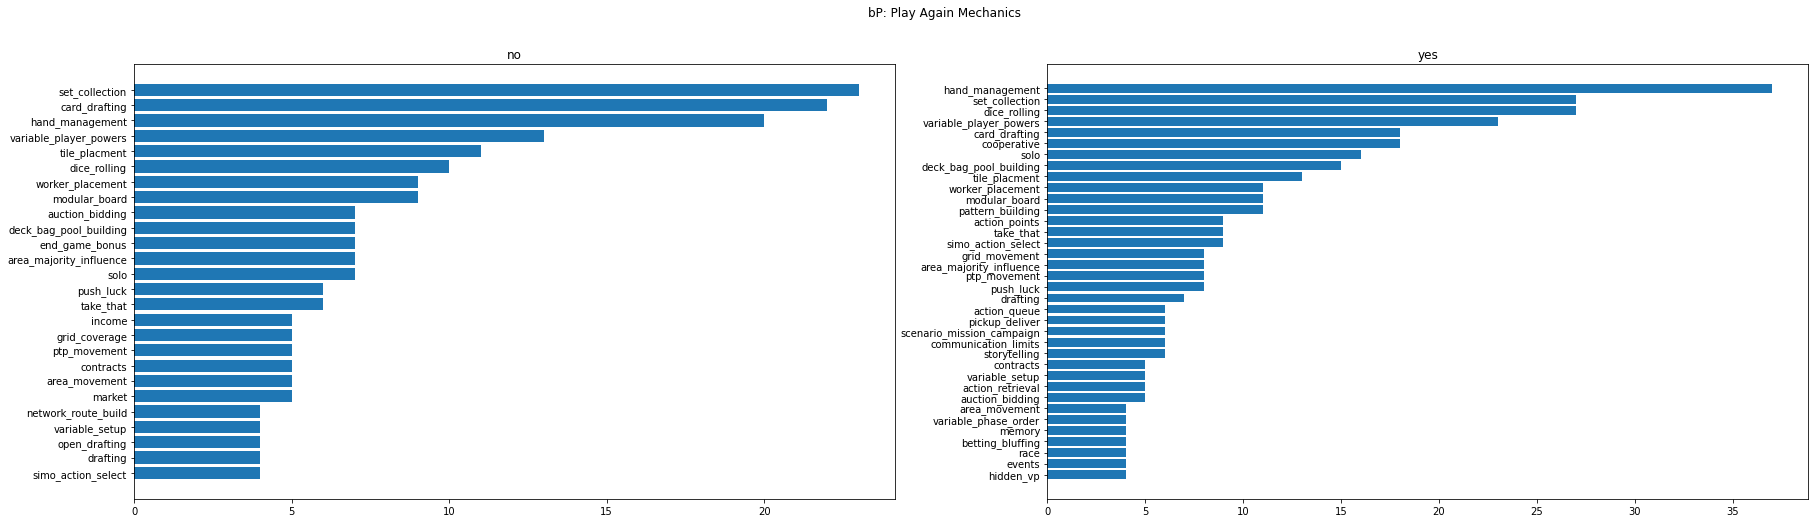

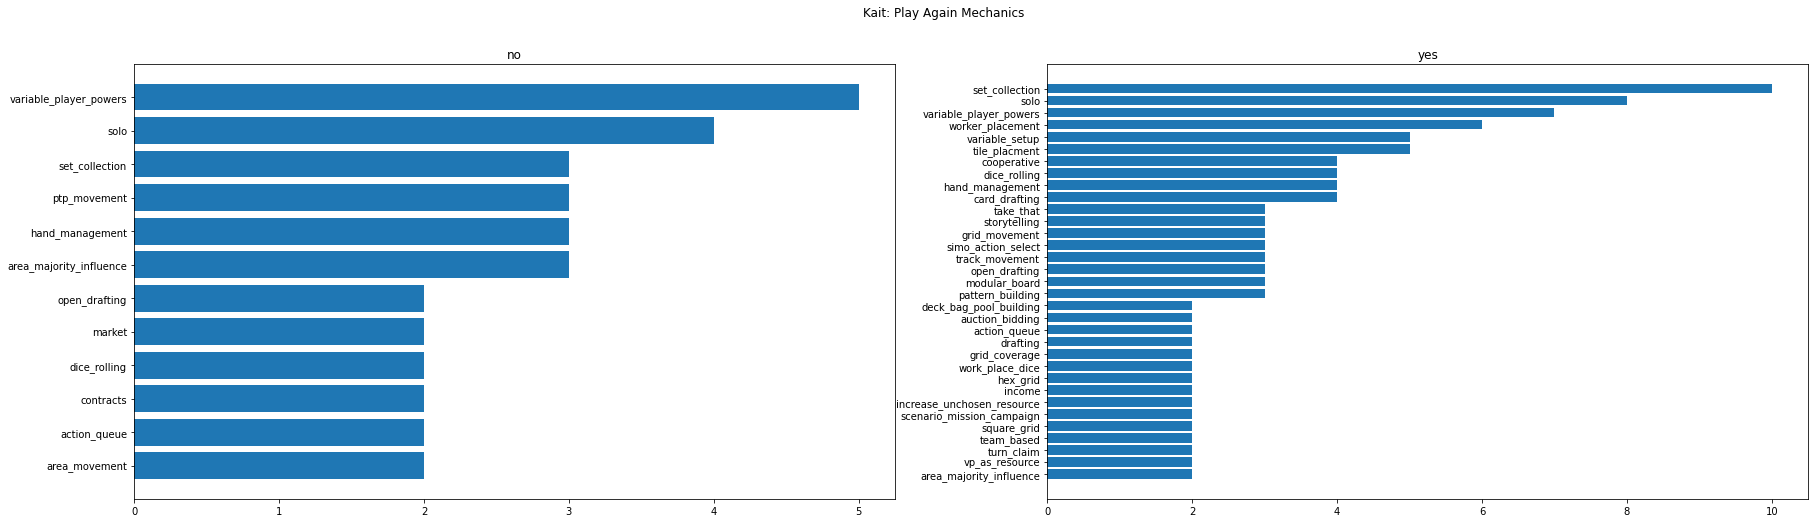

In [19]:
def build_mech_figure(fig, pickup_groups, kait=False):
  for name, group in pickup_groups:
    total_mechs = group.loc[:, 'advantage_token':'work_place_diff'].sum()
    if not kait:
      filter_mechs = total_mechs.where(total_mechs >= 4)
    else:
      filter_mechs = total_mechs.where(total_mechs >= 2)
    sorted_mechs = filter_mechs.dropna().sort_values(ascending=True)
    pos = 121 if name == 'no' else 122
    sub_plot = fig.add_subplot(pos)
    sub_plot.barh(sorted_mechs.keys(), sorted_mechs)
    sub_plot.set_title(name)

eric_figure = plt.figure(figsize=(30,8))
eric_figure.suptitle("Eric: Play Again Mechanics")
eric_pickup_mechs = user_data.groupby(by='eric_play_again')
build_mech_figure(eric_figure, eric_pickup_mechs)

kiwi_figure = plt.figure(figsize=(30,8))
kiwi_figure.suptitle("Kiwi: Play Again Mechanics")
kiwi_pickup_mechs = user_data.groupby(by='kiwi_play_again')
build_mech_figure(kiwi_figure, kiwi_pickup_mechs)

bp_figure = plt.figure(figsize=(30,8))
bp_figure.suptitle("bP: Play Again Mechanics")
bp_pickup_mechs = user_data.groupby(by='bp_play_again')
build_mech_figure(bp_figure, bp_pickup_mechs)

kait_figure = plt.figure(figsize=(30,8))
kait_figure.suptitle("Kait: Play Again Mechanics")
kait_pickup_mechs = user_data.groupby(by='kait_play_again')
build_mech_figure(kait_figure, kait_pickup_mechs, True)

In [18]:
print(user_data[(user_data['kait_play_again'] == 'no')]['game'])

142                     Bonfire
145                  Port Royal
146    Robotech: Reconstruction
165                      Momiji
175                      Tabriz
176                   The Spill
179                   Mind MGMT
180                      Mosaic
181           Root - Redemption
Name: game, dtype: object
